In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from optbinning import OptimalBinning
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
dataset.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [142]:
#TARGET Distribution

a = dataset['Class'].value_counts().reset_index().rename(columns={'index':'transaction','Class':'count'})

a.at[0, 'transaction'] = 'Non-fraudulent'
a.at[1, 'transaction'] = 'Fraudulent'

a

,transaction,count
0,Non-fraudulent,284315
1,Fraudulent,492


#### Credit card transactions flagged as non-fraudulent (0) - 284315
#### Credit card transactions flagged as fraudulent (1) - 492 

### COVERAGE

In [6]:
def find_coverage(df):
    
    c1=list(dataset.columns)
    c2=dataset.count() + dataset.isnull().sum()
    c3=dataset.isnull().sum()
    c4=c2-c3
    c5=round((c3/c2),2)
    c6=round((c4/c2),2)
    
    df=pd.DataFrame({'column_name':c1,'overall_total_count':c2,'overall_missing_count':c3,'overall_non_missing_count':c4,'overall_missing_pct':c5,'overall_non_missing_pct':c6}).reset_index(drop=True)
    return df

In [7]:
find_coverage(dataset)

,column_name,overall_total_count,overall_missing_count,overall_non_missing_count,overall_missing_pct,overall_non_missing_pct
0,Time,284807,0,284807,0.0,1.0
1,V1,284807,0,284807,0.0,1.0
2,V2,284807,0,284807,0.0,1.0
3,V3,284807,0,284807,0.0,1.0
4,V4,284807,0,284807,0.0,1.0
5,V5,284807,0,284807,0.0,1.0
6,V6,284807,0,284807,0.0,1.0
7,V7,284807,0,284807,0.0,1.0
8,V8,284807,0,284807,0.0,1.0
9,V9,284807,0,284807,0.0,1.0


### SELECT FEATURES AND TARGET

In [8]:
#Excluding TIME AND AMOUNT COLUMNS FOR Features, we will have - 
X = dataset[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = dataset['Class']

In [9]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [11]:
list_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

### FEATURES DISTRIBUTIONS - Columns V1 - V28

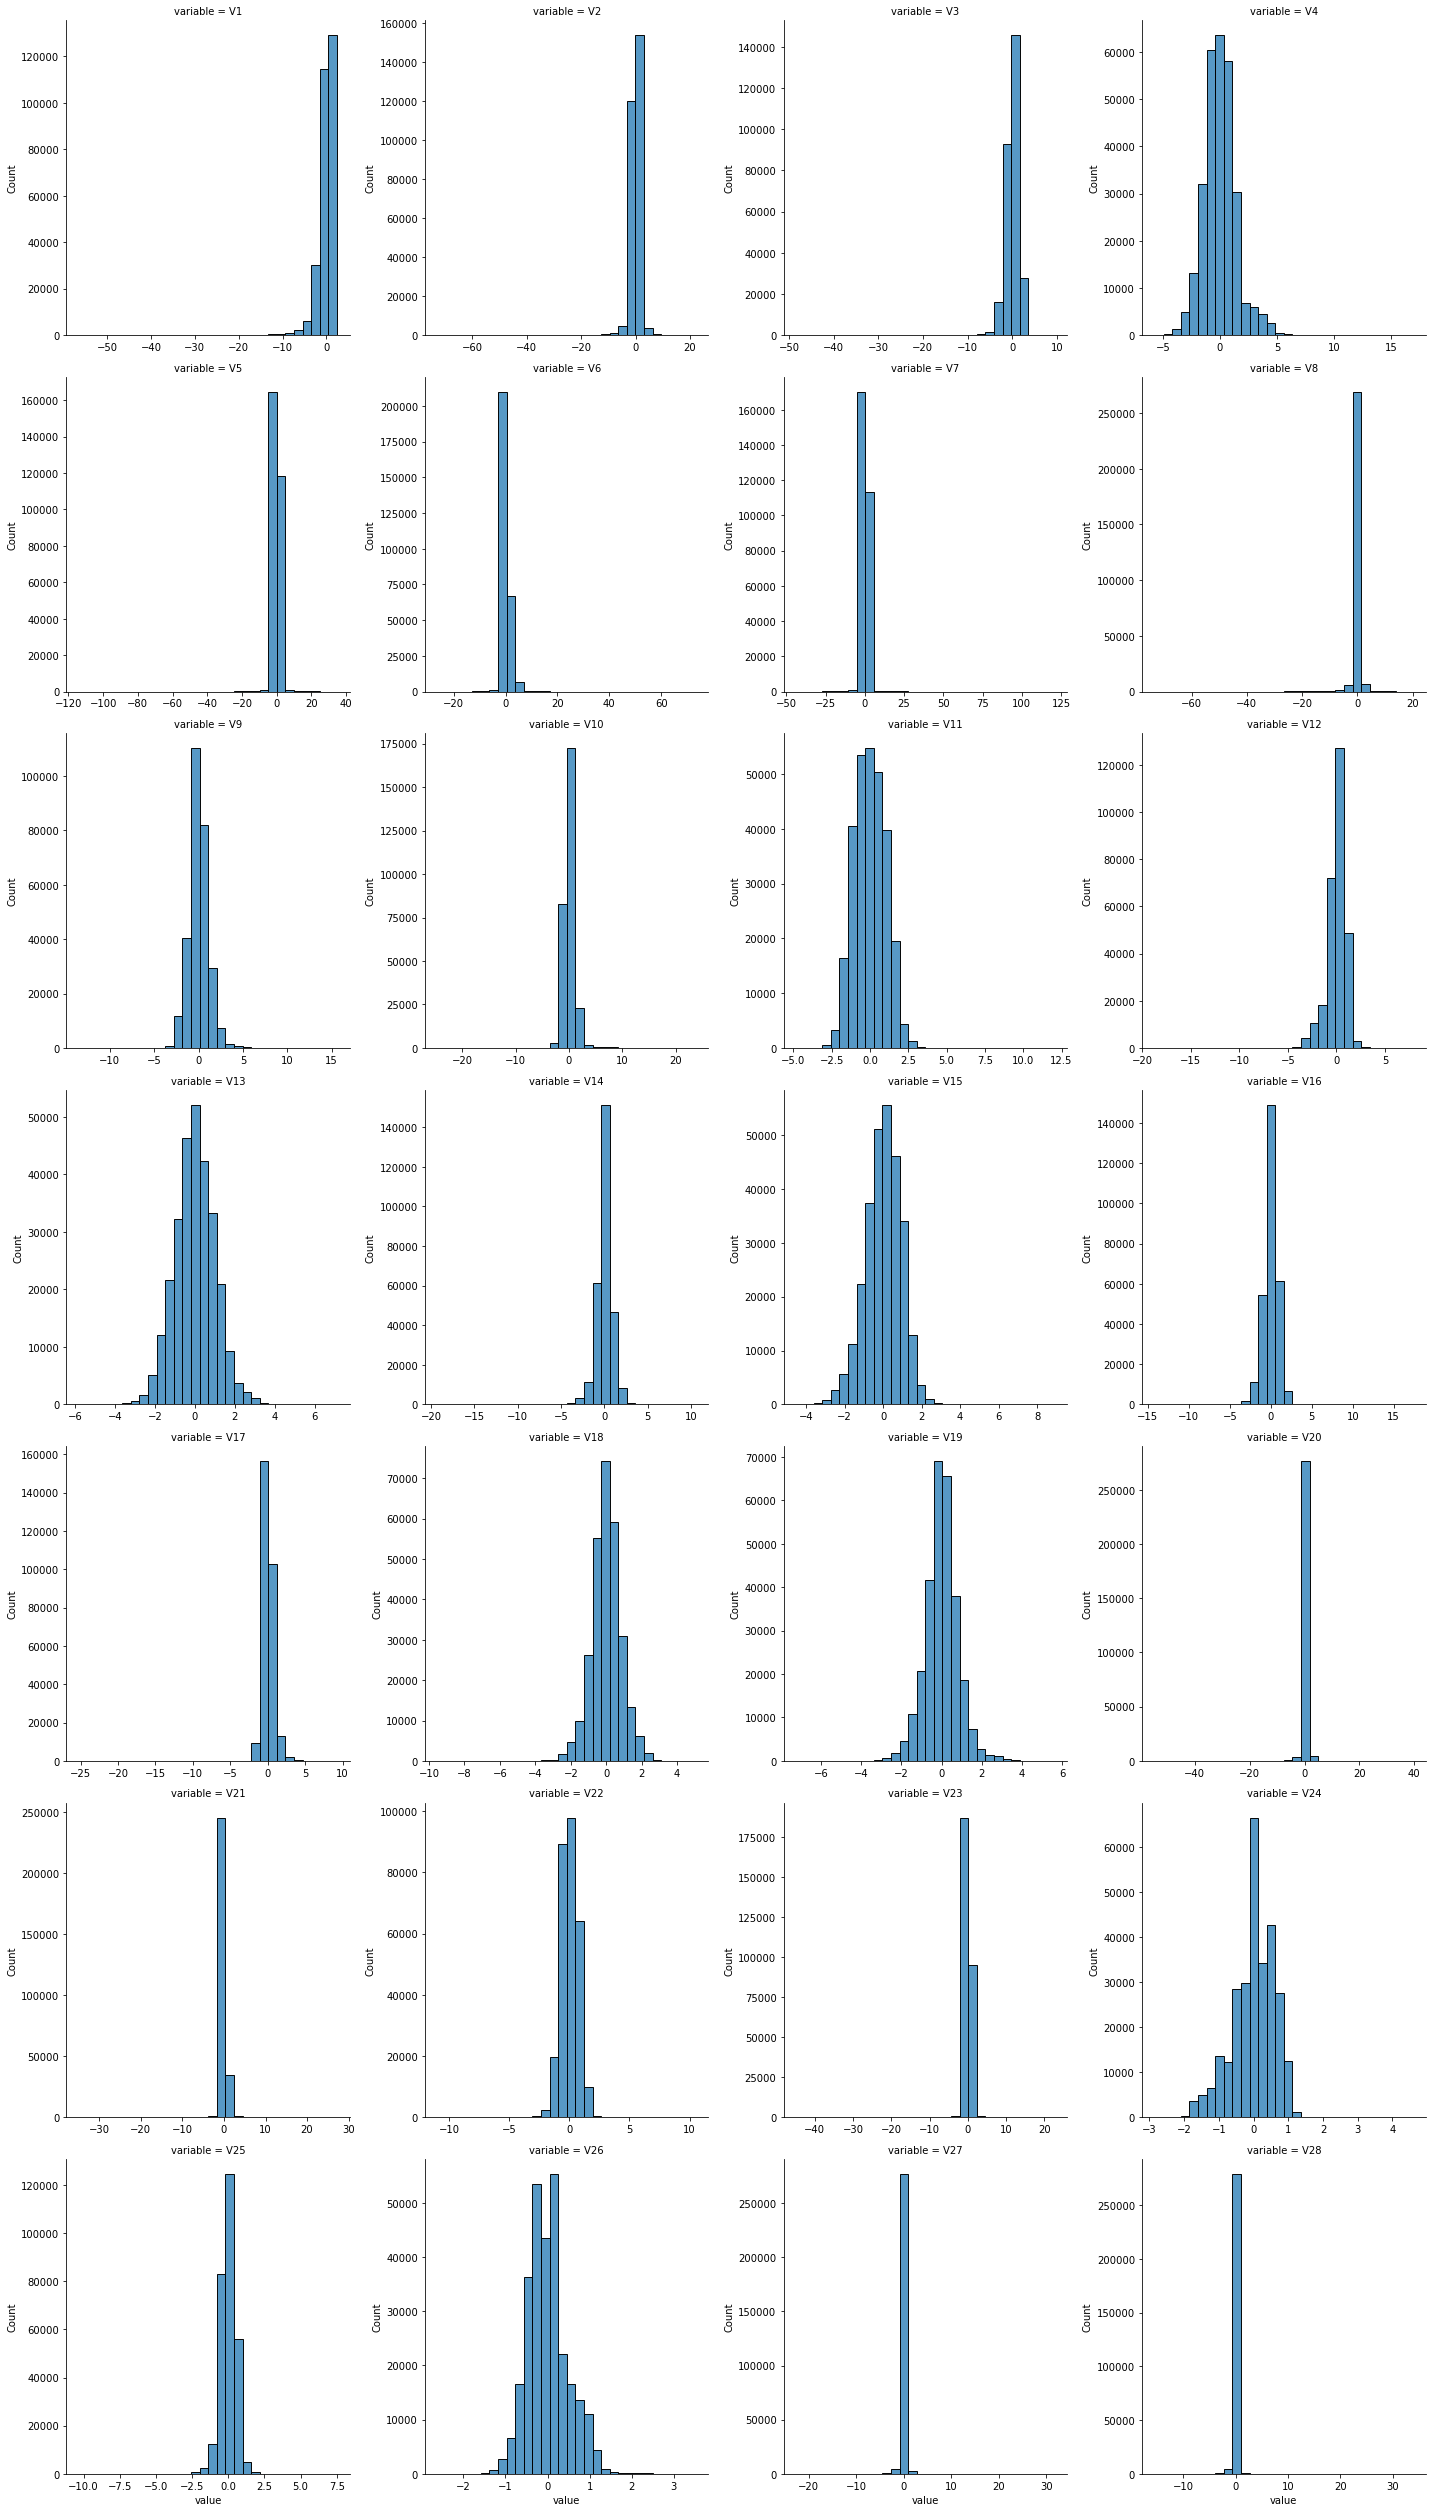

In [12]:
g = sns.FacetGrid(X.melt(), col='variable', col_wrap=4, sharex=False, sharey=False, height=5)
g.map(sns.histplot, 'value', bins=30)

In [13]:
def features_iv():
    con1 =  pd.DataFrame()
    con2 =  pd.DataFrame()
    for i in list_features:
        a = dataset[i].values
        b = dataset['Class']
        
        optc = OptimalBinning(name=i,solver="cp",monotonic_trend="auto", min_prebin_size=0.001)
        optc.fit(a, b)
        binning_tables = optc.binning_table
        c1 = binning_tables.build()
        c1['column_name'] = i
        c1['pct_non_event'] = c1['Non-event']/c1['Non-event'].sum()
        c1['pct_event'] = c1['Event']/c1['Event'].sum()
        #c1['overall_iv'] = c1['IV'].sum()
        c1 = c1[['column_name', 'Bin', 'Count' ,'Non-event', 'Event', 'pct_non_event','pct_event','WoE' ,'IV']]
        con1 = pd.concat([con1,c1]).round(3)
        con1 = con1.astype("str")
        #con2 = con1[['column_name','overall_iv']].drop_duplicates()
    return con1, con2

c1, c2 = features_iv()

In [14]:
c1 = c1.rename(columns={"Non_event":"Non-fraudulent","Event":"Fraudulent","pct_non_event":"pct_non-fraudulent","pct_event":"pct_fraudulent"})

display(c1)

,column_name,Bin,Count,Non-event,Fraudulent,pct_non-fraudulent,pct_fraudulent,WoE,IV
0,V1,"(-inf, -12.83)",508,440,68,0.001,0.069,-4.492092319186542,0.614
1,V1,"[-12.83, -10.28)",431,414,17,0.001,0.017,-3.1667067111536435,0.105
2,V1,"[-10.28, -6.62)",1864,1833,31,0.003,0.032,-2.2796372975681836,0.129
3,V1,"[-6.62, -5.19)",2020,1988,32,0.003,0.033,-2.2302108565059493,0.129
4,V1,"[-5.19, -4.60)",1316,1299,17,0.002,0.017,-2.0232226683083585,0.061
...,...,...,...,...,...,...,...,...,...
4,V28,"[0.36, 0.66)",4195,4106,89,0.0072208641823329756,0.09044715447154472,-2.527791113076003,0.4207573539347062
5,V28,"[0.66, inf)",2022,1972,50,0.003467984453862793,0.0508130081300813,-2.6845788111883073,0.25420289475276986
6,V28,Special,0,0,0,0.0,0.0,0.0,0.0
7,V28,Missing,0,0,0,0.0,0.0,0.0,0.0


In [15]:
display(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

None

In [16]:

b = X.describe()
b

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [17]:
pd.set_option('float_format', '{:.16f}'.format)
b = b.T
b

,count,mean,std,min,25%,50%,75%,max
V1,284807.0000000000000000,0.0000000000000039,1.9586958038574793,-56.4075096313289990,-0.9203733843903220,0.0181087991615309,1.3156416938778650,2.4549299912112099
V2,284807.0000000000000000,0.0000000000000006,1.6513085794769742,-72.7157275629302973,-0.5985499134649160,0.0654855563960555,0.8037238712400945,22.0577289904909009
V3,284807.0000000000000000,-0.0000000000000088,1.5162550051777681,-48.3255893623953980,-0.8903648381551406,0.1798463435635440,1.0271955424655550,9.3825584328211402
V4,284807.0000000000000000,0.0000000000000028,1.4158685749409234,-5.6831711981699504,-0.8486401163312730,-0.0198465294811989,0.7433412894685876,16.8753440335975000
V5,284807.0000000000000000,-0.0000000000000016,1.3802467340314386,-113.7433067111460048,-0.6915970708876575,-0.0543358267364858,0.6119264397351930,34.8016658766686007
V6,284807.0000000000000000,0.0000000000000020,1.3322710897575674,-26.1605059358433003,-0.7682956084604891,-0.2741870765066510,0.3985648963561050,73.3016255459645976
V7,284807.0000000000000000,-0.0000000000000017,1.2370935981826603,-43.5572415712451004,-0.5540758790365226,0.0401030827945351,0.5704360728775986,120.5894939452380044
V8,284807.0000000000000000,-0.0000000000000002,1.1943529026692030,-73.2167184552673973,-0.2086297440394665,0.0223580364366631,0.3273458619234490,20.0072083651213006
V9,284807.0000000000000000,-0.0000000000000031,1.0986320892243226,-13.4340663182300997,-0.6430975702665915,-0.0514287315503490,0.5971390302822686,15.5949946071278003
V10,284807.0000000000000000,0.0000000000000018,1.0888497654025178,-24.5882624372475007,-0.5354257264933235,-0.0929173835961975,0.4539234451395070,23.7451361206545002


### CORRELATION analysis of independent variables with the dependent variable and with each other

In [18]:
def find_correlation_among_features(df):
    cor = X[list(df.columns)].corr()
    X_cor = cor.stack().reset_index()
    X_cor.columns = ['column_1','column_2','correlation_coefficient']
    pd.set_option('float_format', '{:.17f}'.format)
    return X_cor


find_correlation_among_features(X)

,column_1,column_2,correlation_coefficient
0,V1,V1,1.00000000000000000
1,V1,V2,0.00000000000000041
2,V1,V3,-0.00000000000000123
3,V1,V4,-0.00000000000000092
4,V1,V5,0.00000000000000002
...,...,...,...
779,V28,V24,-0.00000000000000028
780,V28,V25,-0.00000000000000070
781,V28,V26,-0.00000000000000028
782,V28,V27,-0.00000000000000031


In [19]:
def find_correlation_features_vs_target(feature, target):
    d = list(feature.columns)
    for i in d:
        x= feature[i].corr(target).round(5)
        print(f'Correlation between {i} and target is {x}')

In [20]:
find_correlation_features_vs_target(X,y)

Correlation between V1 and target is -0.10135
Correlation between V2 and target is 0.09129
Correlation between V3 and target is -0.19296
Correlation between V4 and target is 0.13345
Correlation between V5 and target is -0.09497
Correlation between V6 and target is -0.04364
Correlation between V7 and target is -0.18726
Correlation between V8 and target is 0.01988
Correlation between V9 and target is -0.09773
Correlation between V10 and target is -0.21688
Correlation between V11 and target is 0.15488
Correlation between V12 and target is -0.26059
Correlation between V13 and target is -0.00457
Correlation between V14 and target is -0.30254
Correlation between V15 and target is -0.00422
Correlation between V16 and target is -0.19654
Correlation between V17 and target is -0.32648
Correlation between V18 and target is -0.11149
Correlation between V19 and target is 0.03478
Correlation between V20 and target is 0.02009
Correlation between V21 and target is 0.04041
Correlation between V22 and t

## Building Models

### TEST TRAIN SPLIT

In [21]:
# Split dataset into training and test sets (80/20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (60/40 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

#Split at 60/20/20

#X_train = pd.read_csv("X_train.csv")
#X_val = pd.read_csv("X_val.csv")
#X_test = pd.read_csv("X_test.csv")

#y_train = pd.read_csv("y_train.csv")
#y_val = pd.read_csv("y_val.csv")
#y_test = pd.read_csv("y_test.csv")

In [22]:
# Check the shapes of the resulting sets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (170883, 28), Validation set: (56962, 28), Test set: (56962, 28)


In [23]:
X_train.shape

(170883, 28)

In [24]:
X_test.shape

(56962, 28)

In [25]:
y_train.shape

(170883,)

In [26]:
y_test.shape

(56962,)

In [27]:
X_val.shape

(56962, 28)

In [28]:
y_val.shape

(56962,)

In [29]:
170883 + 56962 + 56962

284807

In [30]:
dataset.shape

(284807, 31)

 ## ALGORITHMS

### 1. Logistic Regression


In [31]:
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred_val = log_reg.predict(X_val)
y_pred_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
cm = confusion_matrix(y_pred_val, y_val)
print(cm)
accuracy_score(y_val, y_pred_val)

[[56875    32]
 [    9    46]]


0.9992802219023208

### Validation

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# evaluate the performance of the model

acc = accuracy_score(y_val, y_pred_val)
prec = precision_score(y_val, y_pred_val)
rec = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
auc = roc_auc_score(y_val, y_pred_val)

In [35]:
y_val.sum()

78

In [36]:
auc

0.7947926865109202

In [37]:
prec

0.8363636363636363

In [38]:
rec

0.5897435897435898

In [39]:
f1

0.6917293233082706

In [40]:
acc

0.9992802219023208

Text(33.0, 0.5, 'Predicted label')

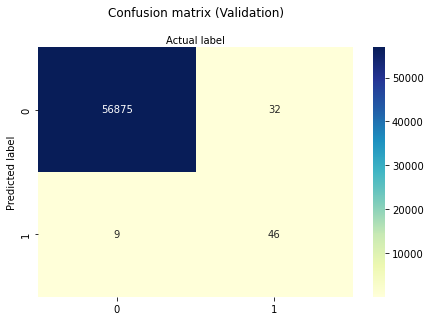

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Validation)', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [42]:
y_pred_val.sum()

55

In [43]:
# actual fraud rate in training set
train_fraud_rate = sum(y_train)/len(y_train)

# actual fraud rate in validation set
val_fraud_rate = sum(y_val)/len(y_val)

# actual fraud rate in test set
test_fraud_rate = sum(y_test)/len(y_test)

In [44]:
print(f"Training set: {train_fraud_rate}, Validation set: {val_fraud_rate}, Test set: {test_fraud_rate}")

Training set: 0.0018492184711176654, Validation set: 0.0013693339419261965, Test set: 0.0017204452090867595


### TRAIN -

In [45]:

y_pred_tr = log_reg.predict(X_train)
y_pred_tr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# evaluate the performance of the model 
acc_tr = accuracy_score(y_train, y_pred_tr)
prec_tr = precision_score(y_train, y_pred_tr)
rec_tr = recall_score(y_train, y_pred_tr)
f1_tr = f1_score(y_train, y_pred_tr)
auc_tr = roc_auc_score(y_train, y_pred_tr)

cm_tr = confusion_matrix( y_pred_tr, y_train)
cm_tr

array([[170540,    117],
       [    27,    199]], dtype=int64)

In [47]:
acc_tr

0.9991573181650603

In [48]:
prec_tr

0.8805309734513275

In [49]:
rec_tr

0.629746835443038

In [50]:
f1_tr

0.7343173431734317

In [51]:
auc_tr

0.8147942699379501

Text(33.0, 0.5, 'Predicted label')

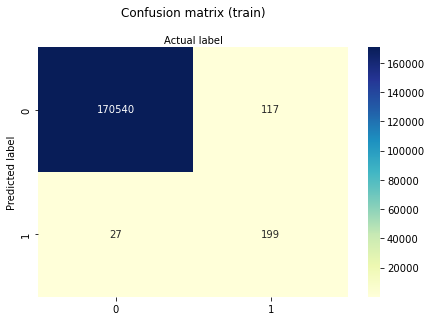

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (train)', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

### TEST - 


In [53]:

y_pred_ts = log_reg.predict(X_test)
y_pred_ts

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
# evaluate the performance of the model 
acc_ts = accuracy_score(y_test, y_pred_ts)
prec_ts = precision_score(y_test, y_pred_ts)
rec_ts = recall_score(y_test, y_pred_ts)
f1_ts = f1_score(y_test, y_pred_ts)
auc_ts = roc_auc_score(y_test, y_pred_ts)

cm_ts = confusion_matrix(y_pred_ts, y_test)
cm_ts

array([[56854,    42],
       [   10,    56]], dtype=int64)

In [55]:
acc_ts

0.9990871107053826

In [56]:
prec_ts

0.8484848484848485

In [57]:
rec_ts

0.5714285714285714

In [58]:
f1_ts

0.6829268292682927

In [59]:
auc_ts

0.7856263566203071

Text(33.0, 0.5, 'Predicted label')

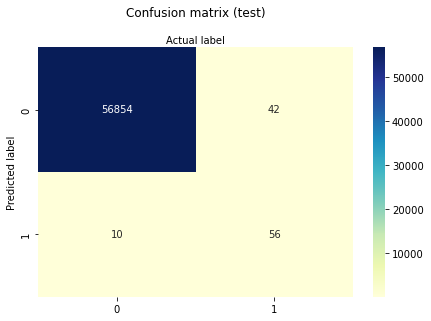

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (test)', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

## Checking all scores for different P Thresholds

In [61]:
#MAIN - VALIDATION Set
cm = confusion_matrix(y_pred_val, y_val)


In [62]:
X_val.shape

(56962, 28)

In [63]:
y_score = log_reg.predict_proba(X_val)

In [64]:
cm

array([[56875,    32],
       [    9,    46]], dtype=int64)

In [65]:
# P = 0.1 - VALIDATION
cm_1 = confusion_matrix(y_score[:, 1] >= 0.1, y_pred_val)
cm_1

array([[56888,     0],
       [   19,    55]], dtype=int64)

In [66]:
# P - 0.2
cm_2 = confusion_matrix(y_score[:, 1] >= 0.2, y_pred_val)
cm_2

array([[56895,     0],
       [   12,    55]], dtype=int64)

In [67]:
# P - 0.3
cm_3 = confusion_matrix(y_score[:, 1] >= 0.3, y_pred_val)
cm_3

array([[56901,     0],
       [    6,    55]], dtype=int64)

In [68]:
# P - 0.4
cm_4 = confusion_matrix(y_score[:, 1] >= 0.4, y_pred_val)
cm_4

array([[56906,     0],
       [    1,    55]], dtype=int64)

In [69]:
# P - 0.5
cm_5 = confusion_matrix(y_score[:, 1] >= 0.5, y_pred_val)
cm_5

array([[56907,     0],
       [    0,    55]], dtype=int64)

In [70]:
# P - 0.6
cm_6 = confusion_matrix(y_score[:, 1] >= 0.6, y_pred_val)
cm_6

array([[56907,     6],
       [    0,    49]], dtype=int64)

In [71]:
# P - 0.7
cm_7 = confusion_matrix(y_score[:, 1] >= 0.7, y_pred_val)
cm_7

array([[56907,    10],
       [    0,    45]], dtype=int64)

In [72]:
# P - 0.8
cm_8 = confusion_matrix(y_score[:, 1] >= 0.8, y_pred_val)
cm_8

array([[56907,    12],
       [    0,    43]], dtype=int64)

In [73]:
# P - 0.9
cm_9 = confusion_matrix(y_score[:, 1] >= 0.9, y_pred_val)
cm_9

array([[56907,    19],
       [    0,    36]], dtype=int64)

In [74]:
# P - 0.95
cm_95 = confusion_matrix(y_score[:, 1] >= 0.95, y_pred_val)
cm_95

array([[56907,    22],
       [    0,    33]], dtype=int64)

In [75]:
# Get predicted probabilities for each class label
probas = log_reg.predict_proba(X_val)

# Loop over different threshold values
for threshold in [0.1,0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 0.95]:
    # Convert probabilities to predicted class labels
    y_pred = (probas[:, 1] >= threshold).astype(int)
    
    # Calculate scores for this threshold value
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    
    # Print scores for this threshold value
    print(f"Threshold = {threshold:.1f}: Accuracy = {accuracy}, Precision = {precision:.3f}, Recall = {recall:.3f}, F1 = {f1:.3f}, AUC = {auc:.3f}")

Threshold = 0.1: Accuracy = 0.9992977774656788, Precision = 0.757, Recall = 0.718, F1 = 0.737, AUC = 0.859
Threshold = 0.2: Accuracy = 0.9993153330290369, Precision = 0.791, Recall = 0.679, F1 = 0.731, AUC = 0.840
Threshold = 0.3: Accuracy = 0.9992451107756047, Precision = 0.787, Recall = 0.615, F1 = 0.691, AUC = 0.808
Threshold = 0.4: Accuracy = 0.9992977774656788, Precision = 0.839, Recall = 0.603, F1 = 0.701, AUC = 0.801
Threshold = 0.5: Accuracy = 0.9992802219023208, Precision = 0.836, Recall = 0.590, F1 = 0.692, AUC = 0.795
Threshold = 0.6: Accuracy = 0.9992802219023208, Precision = 0.878, Recall = 0.551, F1 = 0.677, AUC = 0.776
Threshold = 0.7: Accuracy = 0.9992802219023208, Precision = 0.911, Recall = 0.526, F1 = 0.667, AUC = 0.763
Threshold = 0.8: Accuracy = 0.9992451107756047, Precision = 0.907, Recall = 0.500, F1 = 0.645, AUC = 0.750
Threshold = 0.9: Accuracy = 0.9991222218320986, Precision = 0.889, Recall = 0.410, F1 = 0.561, AUC = 0.705
Threshold = 0.9: Accuracy = 0.9990695

In [76]:
# TRAIN SET SCORES FOR DIFFERENT THRESHOLDS - 
#cm_tr = confusion_matrix( y_pred_tr, y_train)
cm_tr

array([[170540,    117],
       [    27,    199]], dtype=int64)

In [77]:
y_score_tr = log_reg.predict_proba(X_train)

In [78]:
# P = 0.1 - Train
cm_tr_1 = confusion_matrix(y_score_tr[:, 1] >= 0.1, y_pred_tr)
cm_tr_1

array([[170571,      0],
       [    86,    226]], dtype=int64)

In [79]:
# P = 0.2 - Train
cm_tr_2 = confusion_matrix(y_score_tr[:, 1] >= 0.2, y_pred_tr)
cm_tr_2

array([[170599,      0],
       [    58,    226]], dtype=int64)

In [80]:
# P = 0.3 - Train
cm_tr_3 = confusion_matrix(y_score_tr[:, 1] >= 0.3, y_pred_tr)
cm_tr_3

array([[170619,      0],
       [    38,    226]], dtype=int64)

In [81]:
# P = 0.4- Train
cm_tr_4 = confusion_matrix(y_score_tr[:, 1] >= 0.4, y_pred_tr)
cm_tr_4

array([[170643,      0],
       [    14,    226]], dtype=int64)

In [82]:
# P = 0.5- Train
cm_tr_5 = confusion_matrix(y_score_tr[:, 1] >= 0.5, y_pred_tr)
cm_tr_5

array([[170657,      0],
       [     0,    226]], dtype=int64)

In [83]:
# P = 0.6- Train
cm_tr_6 = confusion_matrix(y_score_tr[:, 1] >= 0.6, y_pred_tr)
cm_tr_6

array([[170657,     11],
       [     0,    215]], dtype=int64)

In [84]:
# P = 0.7- Train
cm_tr_7 = confusion_matrix(y_score_tr[:, 1] >= 0.7, y_pred_tr)
cm_tr_7

array([[170657,     21],
       [     0,    205]], dtype=int64)

In [85]:
# P = 0.8- Train
cm_tr_8 = confusion_matrix(y_score_tr[:, 1] >= 0.8, y_pred_tr)
cm_tr_8

array([[170657,     31],
       [     0,    195]], dtype=int64)

In [86]:
# P = 0.9- Train
cm_tr_9 = confusion_matrix(y_score_tr[:, 1] >= 0.9, y_pred_tr)
cm_tr_9

array([[170657,     45],
       [     0,    181]], dtype=int64)

In [87]:
# P = 0.95 - Train
cm_tr_95 = confusion_matrix(y_score_tr[:, 1] >= 0.95, y_pred_tr)
cm_tr_95

array([[170657,     59],
       [     0,    167]], dtype=int64)

In [88]:
# Test SET SCORES FOR DIFFERENT THRESHOLDS - 
#cm_ts = confusion_matrix( y_pred_ts, y_test)
cm_ts

array([[56854,    42],
       [   10,    56]], dtype=int64)

In [89]:
X_val.shape

(56962, 28)

In [90]:
y_scores_ts = log_reg.predict_proba(X_test)

In [91]:
# P = 0.1 - Test
cm_ts_1 = confusion_matrix(y_scores_ts[:, 1] >= 0.1, y_pred_ts)
cm_ts_1

array([[56871,     0],
       [   25,    66]], dtype=int64)

In [92]:
# P = 0.2 - Test
cm_ts_2 = confusion_matrix(y_scores_ts[:, 1] >= 0.2, y_pred_ts)
cm_ts_2

array([[56882,     0],
       [   14,    66]], dtype=int64)

In [93]:
# P = 0.3 - Test
cm_ts_3 = confusion_matrix(y_scores_ts[:, 1] >= 0.3, y_pred_ts)
cm_ts_3

array([[56886,     0],
       [   10,    66]], dtype=int64)

In [94]:
# P = 0.4 - Test
cm_ts_4 = confusion_matrix(y_scores_ts[:, 1] >= 0.4, y_pred_ts)
cm_ts_4

array([[56893,     0],
       [    3,    66]], dtype=int64)

In [95]:
# P = 0.5 - Test
cm_ts_5 = confusion_matrix(y_scores_ts[:, 1] >= 0.5, y_pred_ts)
cm_ts_5

array([[56896,     0],
       [    0,    66]], dtype=int64)

In [96]:
# P = 0.6 - Test
cm_ts_6 = confusion_matrix(y_scores_ts[:, 1] >= 0.6, y_pred_ts)
cm_ts_6

array([[56896,     6],
       [    0,    60]], dtype=int64)

In [97]:
# P = 0.7 - Test
cm_ts_7 = confusion_matrix(y_scores_ts[:, 1] >= 0.7, y_pred_ts)
cm_ts_7

array([[56896,    12],
       [    0,    54]], dtype=int64)

In [98]:
# P = 0.8 - Test
cm_ts_8 = confusion_matrix(y_scores_ts[:, 1] >= 0.8, y_pred_ts)
cm_ts_8

array([[56896,    14],
       [    0,    52]], dtype=int64)

In [99]:
# P = 0.9 - Test
cm_ts_9 = confusion_matrix(y_scores_ts[:, 1] >= 0.9, y_pred_ts)
cm_ts_9

array([[56896,    19],
       [    0,    47]], dtype=int64)

In [100]:
# P = 0.95 - Test
cm_ts_95 = confusion_matrix(y_scores_ts[:, 1] >= 0.95, y_pred_ts)
cm_ts_95

array([[56896,    23],
       [    0,    43]], dtype=int64)

In [101]:
## Coefficient and INTERCEPT

coefficients = log_reg.coef_
intercept = log_reg.intercept_

print(f" Coefficients are {coefficients}, and Intercept is {intercept}")

 Coefficients are [[ 0.09990404 -0.05253176 -0.02855657  0.72718734  0.04259703 -0.09008105
  -0.04330504 -0.21564223 -0.1278362  -0.68370994 -0.08236555  0.01282822
  -0.20349327 -0.61304072 -0.14867778 -0.35898501  0.10153479 -0.06651848
  -0.01405189 -0.25744822  0.37687403  0.59696406 -0.14262966  0.14845208
  -0.10678967 -0.02492633 -0.74665589 -0.43920748]], and Intercept is [-8.66757469]


In [102]:
cm = confusion_matrix(y_pred_val, y_val)
print(cm)

[[56875    32]
 [    9    46]]


In [103]:
len(y_pred_val) - y_pred_val.sum()

56907

In [104]:
y_pred_val.sum()

55

In [105]:
y_prob = log_reg.predict_proba(X_val)[:, 1]
threshold = 0.5
# Create a new column with predicted class
y_pred_xtra = np.where(y_prob > threshold, 1, 0)

In [106]:
len(y_pred_xtra) - y_pred_xtra.sum()

56907

In [107]:
y_pred_xtra.sum()

55

In [108]:
cm_5

array([[56907,     0],
       [    0,    55]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

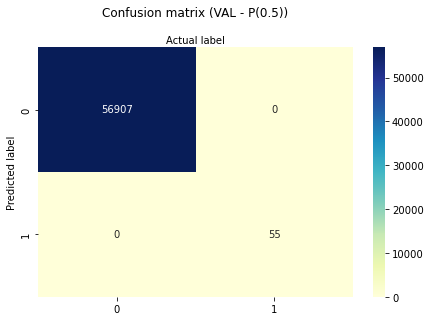

In [109]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (VAL - P(0.5))', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [115]:
X_train.shape

(170883, 28)

## 2. K Neighbours

In [121]:
knn = KNeighborsClassifier(n_neighbors=15)

In [122]:
# train the classifier using the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [123]:
# make predictions on the Validation set
y_pred_knn_val = knn.predict(X_val)

In [153]:
len(y_val) - y_val.sum()

56884

In [124]:
cm_knn_val = confusion_matrix(y_pred_knn_val, y_val)
cm_knn_val

array([[56877,    18],
       [    7,    60]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

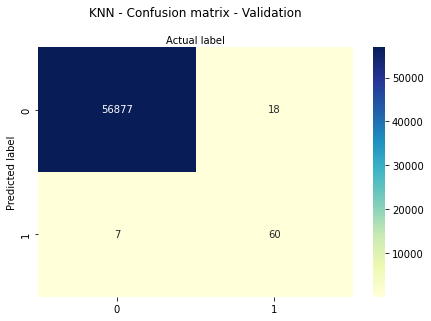

In [160]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Validation', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [127]:
# evaluate the performance of the model

acc_knn_val = accuracy_score(y_pred_knn_val, y_val)
prec_knn_val = precision_score(y_pred_knn_val, y_val)
rec_knn_val = recall_score(y_pred_knn_val, y_val)
f1_knn_val = f1_score(y_pred_knn_val, y_val)
auc_knn_val = roc_auc_score(y_pred_knn_val, y_val)

In [129]:
print(f" Using KNN algorithm on Validation set, Accuracy is {acc_knn_val}, Precision is {prec_knn_val}, Recall is {rec_knn_val}, F1-Score is {f1_knn_val}, AUC score is {auc_knn_val}")

 Using KNN algorithm on Validation set, Accuracy is 0.9995611109160493, Precision is 0.7692307692307693, Recall is 0.8955223880597015, F1-Score is 0.8275862068965517, AUC score is 0.9476030078975016


### 2.2 - KNN  ON TRAIN SET - 

In [131]:
# make predictions on the Train set
y_pred_knn_tr = knn.predict(X_train)

In [132]:
cm_knn_tr = confusion_matrix(y_pred_knn_tr, y_train)
cm_knn_tr

array([[170530,     75],
       [    37,    241]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

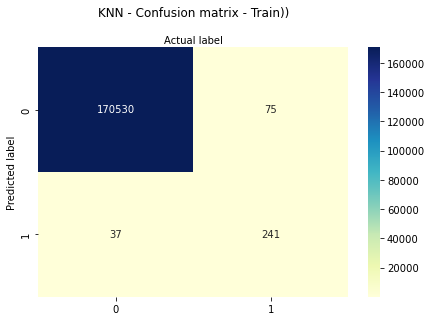

In [133]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Train))', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [134]:
# evaluate the performance of the model

acc_knn_tr = accuracy_score(y_pred_knn_tr, y_train)
prec_knn_tr = precision_score(y_pred_knn_tr, y_train)
rec_knn_tr = recall_score(y_pred_knn_tr, y_train)
f1_knn_tr = f1_score(y_pred_knn_tr, y_train)
auc_knn_tr = roc_auc_score(y_pred_knn_tr, y_train)

In [191]:
print(f" Using KNN algorithm on Train set, Accuracy is {acc_knn_tr}, Precision is {prec_knn_tr:.2f}, Recall is {rec_knn_tr:.2f}, F1-Score is {f1_knn_tr:.2f}, AUC score is {auc_knn_tr:.2f}")

 Using KNN algorithm on Train set, Accuracy is 0.999344580795047, Precision is 0.76, Recall is 0.87, F1-Score is 0.81, AUC score is 0.93


### 2.3 - KNN  ON TEST SET - 

In [140]:
# make predictions on the Train set
y_pred_knn_ts = knn.predict(X_test)

In [141]:
cm_knn_ts = confusion_matrix(y_pred_knn_ts, y_test)
cm_knn_ts

array([[56854,    24],
       [   10,    74]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

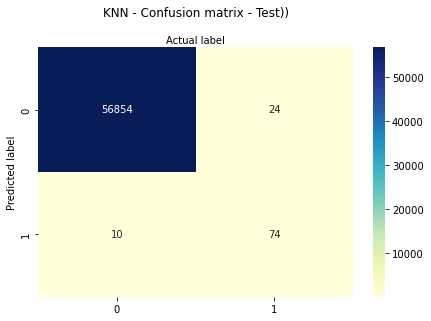

In [142]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Test))', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [143]:
# evaluate the performance of the model

acc_knn_ts = accuracy_score(y_pred_knn_ts, y_test)
prec_knn_ts = precision_score(y_pred_knn_ts, y_test)
rec_knn_ts = recall_score(y_pred_knn_ts, y_test)
f1_knn_ts = f1_score(y_pred_knn_ts, y_test)
auc_knn_ts = roc_auc_score(y_pred_knn_ts, y_test)

In [192]:
print(f" Using KNN algorithm on Train set, Accuracy is {acc_knn_ts}, Precision is {prec_knn_ts:.2f}, Recall is {rec_knn_ts:.2f}, F1-Score is {f1_knn_ts:.2f}, AUC score is {auc_knn_ts:.2f}")

 Using KNN algorithm on Train set, Accuracy is 0.999403110845827, Precision is 0.76, Recall is 0.88, F1-Score is 0.81, AUC score is 0.94


In [145]:
X_val.shape

(56962, 28)

In [146]:
X_train.shape

(170883, 28)

In [157]:
len(y_test) - y_test.sum()

56864

In [156]:
y_test.sum()

98

## 3. Support Vector Machine

In [161]:
clf = svm.SVC(kernel='linear', C=1)

# train the classifier using the training set
clf.fit(X_train, y_train)


SVC(C=1, kernel='linear')

### 3.1 SVM on VALIDATION Set

In [162]:
# make predictions on the testing set
y_pred_svm_val = clf.predict(X_val)

In [164]:
cm_svm_val = confusion_matrix(y_pred_svm_val, y_val)
cm_svm_val

array([[56875,    17],
       [    9,    61]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

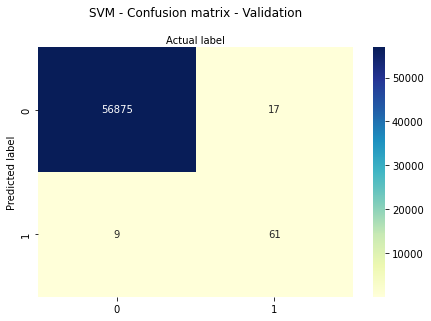

In [166]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Validation', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [167]:
# evaluate the performance of the model

acc_svm_val = accuracy_score(y_pred_svm_val, y_val)
prec_svm_val = precision_score(y_pred_svm_val, y_val)
rec_svm_val = recall_score(y_pred_svm_val, y_val)
f1_svm_val = f1_score(y_pred_svm_val, y_val)
auc_svm_val = roc_auc_score(y_pred_svm_val, y_val)

In [193]:
print(f" Using SVM algorithm on Validation set, Accuracy is {acc_svm_val}, Precision is {prec_svm_val:.2f}, Recall is {rec_svm_val:.2f}, F1-Score is {f1_svm_val:.2f}, AUC score is {auc_svm_val:.2f}")

 Using SVM algorithm on Validation set, Accuracy is 0.9995435553526912, Precision is 0.78, Recall is 0.87, F1-Score is 0.82, AUC score is 0.94


### 3.2 SVM on TRAIN SET

In [169]:
y_pred_svm_tr = clf.predict(X_train)

In [171]:
cm_svm_tr = confusion_matrix(y_pred_svm_tr, y_train)
cm_svm_tr

array([[170518,     65],
       [    49,    251]], dtype=int64)

In [175]:
len(y_train) - y_train.sum()

170567

In [174]:
y_train.sum()

316

Text(33.0, 0.5, 'Predicted label')

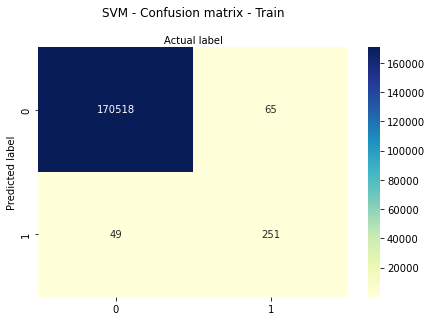

In [176]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Train', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [177]:
# evaluate the performance of the model

acc_svm_tr = accuracy_score(y_pred_svm_tr, y_train)
prec_svm_tr = precision_score(y_pred_svm_tr, y_train)
rec_svm_tr = recall_score(y_pred_svm_tr, y_train)
f1_svm_tr = f1_score(y_pred_svm_tr, y_train)
auc_svm_tr = roc_auc_score(y_pred_svm_tr, y_train)

In [179]:
print(f" Using SVM algorithm on TRAIN set, Accuracy is {acc_svm_tr:.3f}, Precision is {prec_svm_tr:.3f}, Recall is {rec_svm_tr:.3f}, F1-Score is {f1_svm_tr:.3f}, AUC score is {auc_svm_tr:.3f}")

 Using SVM algorithm on TRAIN set, Accuracy is 0.999, Precision is 0.794, Recall is 0.837, F1-Score is 0.815, AUC score is 0.918


### 3.3 SVM on TEST SET

In [182]:
y_pred_svm_ts = clf.predict(X_test)

In [183]:
cm_svm_ts = confusion_matrix(y_pred_svm_ts, y_test)
cm_svm_ts

array([[56846,    23],
       [   18,    75]], dtype=int64)

In [186]:
len(y_test) - y_test.sum()

56864

In [185]:
y_test.sum()

98

Text(33.0, 0.5, 'Predicted label')

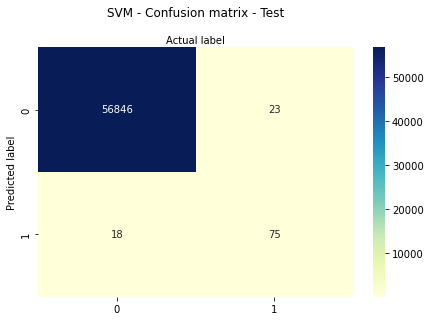

In [187]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Test', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [188]:
# evaluate the performance of the model

acc_svm_ts = accuracy_score(y_pred_svm_ts, y_test)
prec_svm_ts = precision_score(y_pred_svm_ts, y_test)
rec_svm_ts = recall_score(y_pred_svm_ts, y_test)
f1_svm_ts = f1_score(y_pred_svm_ts, y_test)
auc_svm_ts = roc_auc_score(y_pred_svm_ts, y_test)

In [194]:
print(f" Using SVM algorithm on TEST set, Accuracy is {acc_svm_ts}, Precision is {prec_svm_ts:.3f}, Recall is {rec_svm_ts:.3f}, F1-Score is {f1_svm_ts:.2f}, AUC score is {auc_svm_ts:.3f}")

 Using SVM algorithm on TEST set, Accuracy is 0.9992802219023208, Precision is 0.765, Recall is 0.806, F1-Score is 0.79, AUC score is 0.903


## 4. Decision tree

In [112]:
dct = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.1 - Decision Tree - Validation

In [115]:
# Make predictions on the Validation data
y_pred_dct_val = dct.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
#VALIDATION
cm_dct_val = confusion_matrix(y_pred_dct_val, y_val)
cm_dct_val

array([[56860,    17],
       [   24,    61]], dtype=int64)

In [117]:
len(y_val) - y_val.sum()

56884

In [118]:
y_val.sum()

78

Text(33.0, 0.5, 'Predicted label')

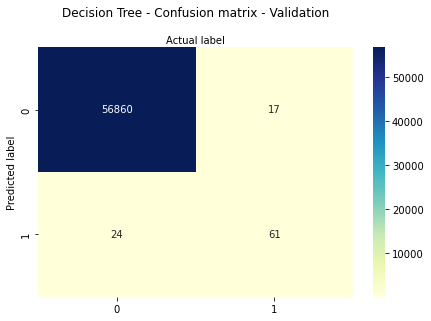

In [119]:
#VALIDATION - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_dct_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree - Confusion matrix - Validation', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [121]:
# evaluate the performance of the model

acc_dct_val = accuracy_score(y_pred_dct_val, y_val)
prec_dct_val = precision_score(y_pred_dct_val, y_val)
rec_dct_val = recall_score(y_pred_dct_val, y_val)
f1_dct_val = f1_score(y_pred_dct_val, y_val)
auc_dct_val = roc_auc_score(y_pred_dct_val, y_val)

In [124]:
print(f" Using Decision tree algorithm on Validation set, Accuracy is {acc_dct_val}, Precision is {prec_dct_val:.2f}, Recall is {rec_dct_val:.2f}, F1-Score is {f1_dct_val:.2f}, AUC score is {auc_dct_val:.2f}")

 Using Decision tree algorithm on Validation set, Accuracy is 0.9992802219023208, Precision is 0.78, Recall is 0.72, F1-Score is 0.75, AUC score is 0.86


### 4.2 Decision Tree - TRAIN SET

In [125]:
y_pred_dct_tr = dct.predict(X_train)

In [126]:
cm_dct_tr = confusion_matrix(y_pred_dct_tr, y_train)
cm_dct_tr

array([[170567,      0],
       [     0,    316]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

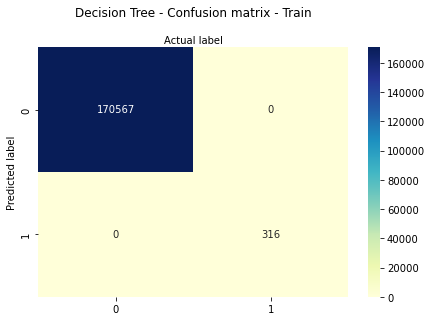

In [129]:
#Train - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_dct_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree - Confusion matrix - Train', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [130]:
# evaluate the performance of the model

acc_dct_tr = accuracy_score(y_pred_dct_tr, y_train)
prec_dct_tr = precision_score(y_pred_dct_tr, y_train)
rec_dct_tr = recall_score(y_pred_dct_tr, y_train)
f1_dct_tr = f1_score(y_pred_dct_tr, y_train)
auc_dct_tr = roc_auc_score(y_pred_dct_tr, y_train)

In [133]:
print(f" Using Decision tree algorithm on Train set, Accuracy is {acc_dct_tr}, Precision is {prec_dct_tr:.2}, Recall is {rec_dct_tr:.2f}, F1-Score is {f1_dct_tr:.2f}, AUC score is {auc_dct_tr:.2f}")

 Using Decision tree algorithm on Train set, Accuracy is 1.0, Precision is 1.0, Recall is 1.00, F1-Score is 1.00, AUC score is 1.00


### 4.3 Test SET

In [134]:
y_pred_dct_ts = dct.predict(X_test)

In [135]:
cm_dct_ts = confusion_matrix(y_pred_dct_ts, y_test)
cm_dct_ts

array([[56831,    21],
       [   33,    77]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

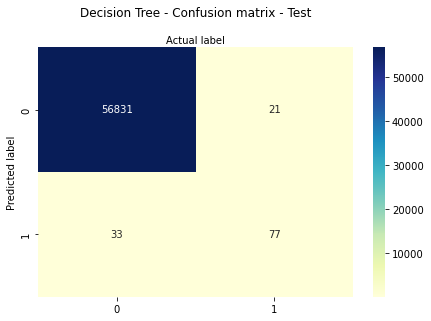

In [136]:
#Test - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_dct_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree - Confusion matrix - Test', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [140]:
# evaluate the performance of the model

acc_dct_ts = accuracy_score(y_pred_dct_ts, y_test)
prec_dct_ts = precision_score(y_pred_dct_ts, y_test)
rec_dct_ts = recall_score(y_pred_dct_ts, y_test)
f1_dct_ts = f1_score(y_pred_dct_ts, y_test)
auc_dct_ts = roc_auc_score(y_pred_dct_ts, y_test)

In [141]:
print(f" Using Decision tree algorithm on Train set, Accuracy is {acc_dct_ts}, Precision is {prec_dct_ts:.2}, Recall is {rec_dct_ts:.2f}, F1-Score is {f1_dct_ts:.2f}, AUC score is {auc_dct_ts:.2f}")

 Using Decision tree algorithm on Train set, Accuracy is 0.9990519995786665, Precision is 0.79, Recall is 0.70, F1-Score is 0.74, AUC score is 0.85
